In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [20]:
file_path = "day_3.csv"
df = pd.read_csv(file_path, delimiter=",")  

print(df.head())

   Unnamed: 0  year        gdp  employed  total  female_percentage      gini  \
0           0     0  947610.99  0.516000    500           0.468000  0.604055   
1           1     1  931427.95  0.507905    506           0.468379  0.607001   
2           2     2  872704.64  0.498039    510           0.468627  0.634642   
3           3     3  875281.14  0.492188    512           0.466797  0.613444   
4           4     4  853371.77  0.483431    513           0.469786  0.625739   

   average_age  
0    33.516000  
1    34.106719  
2    34.831373  
3    35.560547  
4    36.230019  


   year  total  employed  average_age  predicted gdp
0   111    505      0.48           36   1.011524e+06
1   112    505      0.46           36   9.924565e+05
2   113    505      0.50           37   1.186639e+06
3   114    505      0.51           37   1.202341e+06
4   115    505      0.52           39   1.227068e+06


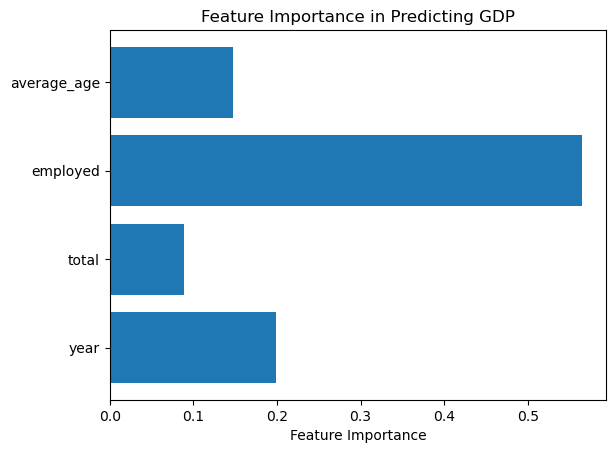

In [23]:


# Selecting features (X) and target (y)
X = df[['year', 'total', 'employed', 'average_age', ]]
y = df['gdp']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Forecasting the next 5 years
future_years = [max(df['year']) + i for i in range(1, 6)]
future_data = pd.DataFrame({
    'year': future_years, 
    'total' : [505,505,505,505,505],
    'employed': [0.48,
0.46,
0.50,
0.51,
0.52],
    'average_age': [36,
36,
37,
37,
39]  
})

# Predict GDP for future years
future_gdp_predictions = model.predict(future_data)

# Display results
future_data['predicted gdp'] = future_gdp_predictions
print(future_data)

# Feature Importance to see which factors contribute most to GDP prediction
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting GDP")
plt.show()


In [ ]:


# Selecting features (X) and target (y)
X = df[['year', 'employed', 'average_age', 'total']]
y = df['gini']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Forecasting the next 5 years
future_years = [max(df['year']) + i for i in range(1, 6)]
future_data = pd.DataFrame({
    'year': future_years, 
    'employed': [0.48,
0.46,
0.50,
0.51,
0.52],
    'average_age': [36,
36,
37,
37,
39]  
})

# Predict GDP for future years
future_gdp_predictions = model.predict(future_data)

# Display results
future_data['predicted gdp'] = future_gdp_predictions
print(future_data)

# Feature Importance to see which factors contribute most to GDP prediction
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting GDP")
plt.show()
